In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [50]:
data=pd.read_csv("listings.csv")
data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20210210181232,2021-02-12,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,NaN,https://a0.muscache.com/pictures/4740524/63f82...,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,90%,f,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,NaN,78702,NaN,30.27750,-97.71398,Entire house,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Free parking on premises"", ""Hair dryer"", ""Pa...",$200.00,7,180,7.0,7.0,180.0,180.0,7.0,180.0,NaN,t,13,13,42,131,2021-02-12,24,0,0,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,NaN,f,3,2,1,0,0.17
1,5245,https://www.airbnb.com/rooms/5245,20210210181232,2021-02-12,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,NaN,https://a0.muscache.com/pictures/5167505/b33b5...,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,90%,f,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,NaN,78702,NaN,30.27577,-97.71379,Private room in house,Private room,2,NaN,1 private bath,1.0,2.0,"[""Free parking on premises"", ""Hair dryer"", ""Br...",$114.00,30,60,30.0,30.0,60.0,60.0,30.0,60.0,NaN,t,0,0,0,0,2021-02-12,9,0,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,NaN,f,3,2,1,0,0.06
2,5456,https://www.airbnb.com/rooms/5456,20210210181232,2021-02-12,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within a few hours,100%,91%,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, Texas, United States",78702,NaN,30.26112,-97.73448,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Hair dryer"", ""Dishes and silverware"", ""Air c...",$104.00,2,90,2.0,2.0,90.0,90.0,2.0,90.0,NaN,t,24,54,84,354,2021-02-12,543,20,3,2009-03-08,2021-02-01,97.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1,1,0,0,3.74
3,5636,https://www.a

<h2>a) Top areas with highest number of listing in neighbourhood

In [51]:
x=data['latitude'].median()
y=data['longitude'].median()
print(x,y)

30.270175000000002 -97.745035


In [52]:
lats = data['latitude'].tolist()
lons = data['longitude'].tolist()
locations = list(zip(lats, lons))


In [53]:
import folium
from folium.plugins import FastMarkerCluster
import folium.plugins as plugins

m = folium.Map([x,y], zoom_start=4)
FastMarkerCluster(data=locations).add_to(m)
m

<h2>c) Top 10 Hosts

In [55]:
hosts = data.groupby(['host_id','host_name','host_since','host_is_superhost']).size().reset_index(name='num_host_listings')
hosts = hosts.sort_values(by=['num_host_listings'], ascending=False)
hosts = hosts[hosts['num_host_listings'] >= 20]
top = hosts.head(10)
top

,host_id,host_name,host_since,host_is_superhost,num_host_listings
6663,359036978,Kia,2020-07-28,t,358
5016,104309976,WanderJaunt,2016-11-19,f,131
5066,109638288,TurnKey Vacation Rentals,2017-01-03,f,82
1511,8167447,Martin,2013-08-14,f,81
5195,118565935,Renters Club,2017-02-28,f,56
6631,346827202,Madalynn,2020-05-19,f,48
5937,194953121,Christian,2018-06-11,f,45
6023,210733801,Above,2018-08-20,f,43
6694,368944610,Kia,2020-09-23,f,40
5272,124060715,Evolve Vacation Rental,2017-04-03,f,38


In [56]:
top10 = top['host_name'].tolist()

In [57]:
print("Top 10 host by their number of listings:");
for x in range(len(top10)):
    print(top10[x])

Top 10 host by their number of listings:
Kia
WanderJaunt
TurnKey Vacation Rentals
Martin
Renters Club
Madalynn
Christian
Above
Kia
Evolve Vacation Rental


<h2>d) Insights and Review Metrics

1.According to our data, hotel rooms and shared rooms are very rare in Austin where people are more likely to live in their separate homes,apartment and private rooms.

2.Martin, Mo, Amanda, Michael and Leo are the top hosts whose listings of private rooms are high. we can see that Martin and Leo are professional hosts because they seems to be in this field since 2013.

3.Kia, WanderJaunt, TurnKey Vacation Rentals, Martin, Renters Club, Madalynn, Christian, Above, Kia, Evolve Vacation Rental are top 10 host by their highest number of listings.

4.We can see that neighbourhood id of 78704 has highest average price(in dollars).

5.We can see that there is constant average review score(atleast 10 reviews) for almost every neighbourhood in Austin.

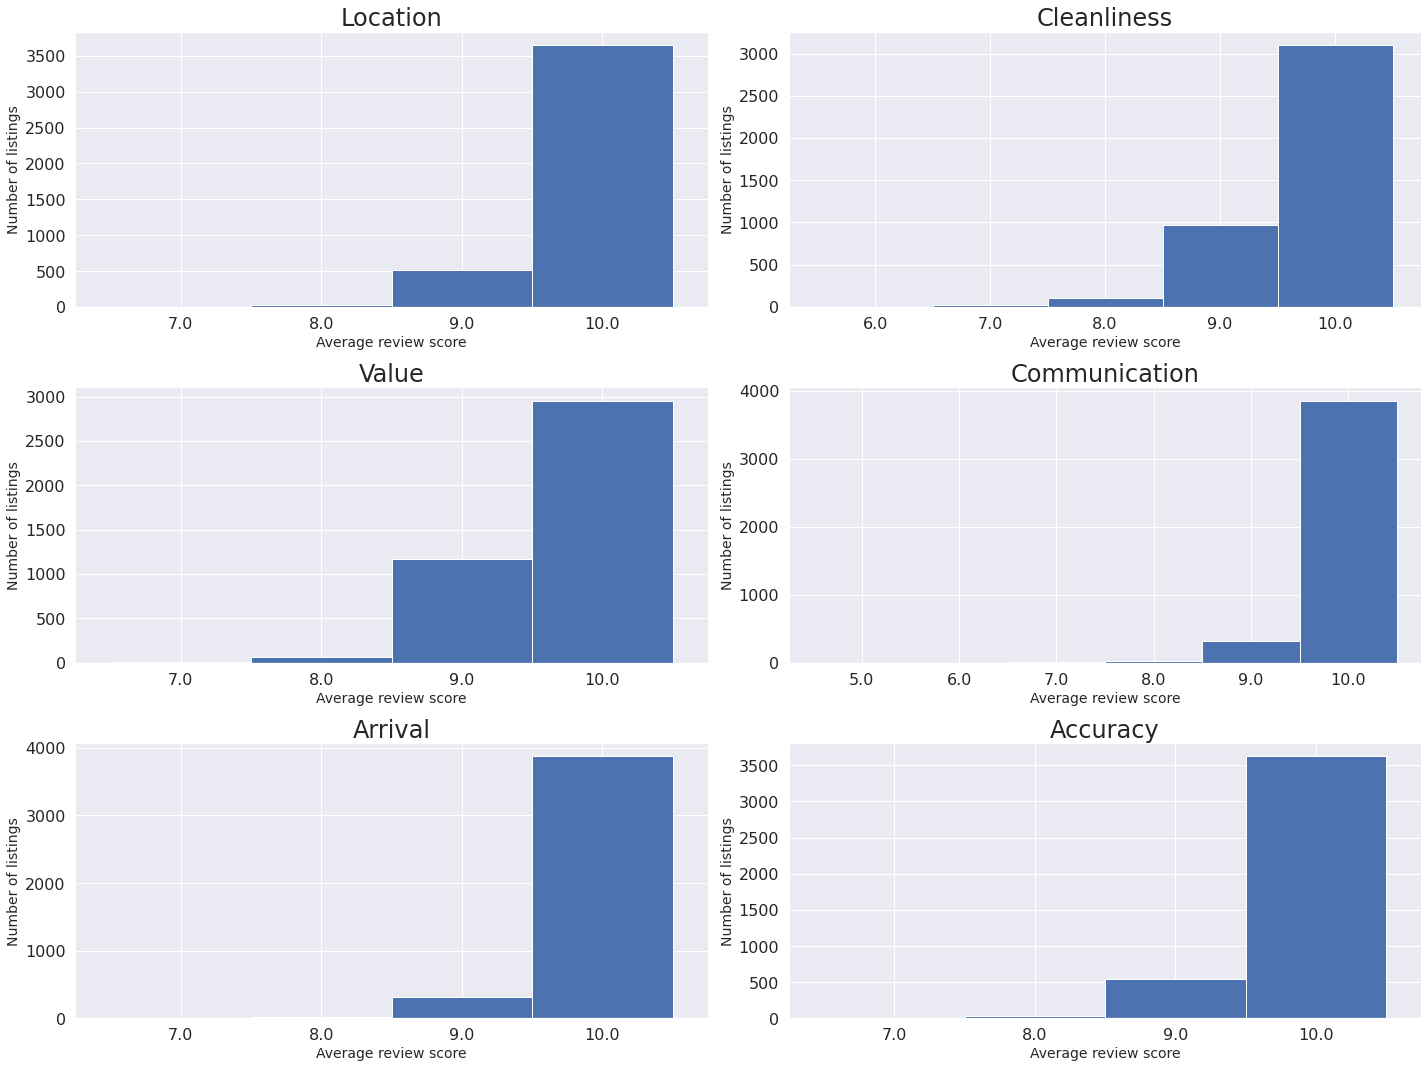

In [58]:
listings10 = data[data['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()